# M5: Classification Model Performance Metrics
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/Zhengnan817/DAV-6150/tree/f8f833270c9ec2695a2883782784cb272d4e0127/M5

## Introduction
Evaluation of the performance of classification models can be facilitated through a combination of calculating certain types of performance metrics and generating model performance evaluation graphics. For this assignment we will be tasked with calculating a suite of classification model performance metrics via Python code functions that we create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics. We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models.

## Task
### Task 1-2
Load the provided M5_Data.csv file to our DAV 6150 Github Repository.Using a Jupyter Notebook, read the data set from our Github repository and load it into a Pandas dataframe.

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/M5/src/M5_Data.csv")
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


### Task 3
In this part, we will use crosstab() function to create a confusion matrix, to evaluate binary classification model performance. And the matrix compares actual versus predicted classifications, shows the counts of True Positives, False Positives, True Negatives, and False Negatives.

In [3]:
# Calculate the confusion matrix
confusion_matrix = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'])

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 Predicted    0   1
Actual            
0          119   5
1           30  27


In [4]:
# Observe the distribution of actual and predicted classifications
print("Actual class distribution:\n", df['class'].value_counts())
print("-------------------------------")
print("Predicted class distribution:\n", df['scored.class'].value_counts())

Actual class distribution:
 class
0    124
1     57
Name: count, dtype: int64
-------------------------------
Predicted class distribution:
 scored.class
0    149
1     32
Name: count, dtype: int64


From the confusion matrix, we can verify that the sums of the rows correspond to the actual class distribution: 119 + 5 = 124 and 30 + 27 = 57. What's more, the column sums correspond with the predicted class distribution: 119 + 30 = 149 and 5 + 27 = 32.

### Task 4
In this part, we will extract key performance metrics from the confusion matrix: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). The output shows that the model predicts 27 True Positives, 119 True Negatives, 5 False Positives, and 30 False Negatives, which are important for evaluating the performance of the classification model.

In [5]:
# Extracting values from the confusion matrix
TP = confusion_matrix.loc[1, 1] 
TN = confusion_matrix.loc[0, 0]  
FP = confusion_matrix.loc[0, 1]  
FN = confusion_matrix.loc[1, 0]  

# Displaying the extracted values
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 27
True Negatives: 119
False Positives: 5
False Negatives: 30


### Task 5-9
In this part, we create a function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the metrics for the predictions without utilizing any pre-built Python metric calculation functions. Using the crosstab function to calculate the TP,FP, TN and FN, we can easily get the accuracy, precision, sensitivity, specificity, and F1 Score of the prediction result.


In [6]:
def task5_9(actual, predicted):
    """
    Calculate accuracy metric for binary classification.
    
    Args:
    actual_labels: List of actual labels.
    predicted_labels: List of predicted labels.
    
    Returns:
    tuple: (accuracy, precision, sensitivity, specificity, f1_score).
    """
    confusion_matrix = pd.crosstab(actual, predicted)
    TP = confusion_matrix.loc[1, 1]
    FP = confusion_matrix.loc[0, 1]
    TN = confusion_matrix.loc[0, 0]
    FN = confusion_matrix.loc[1, 0]

    accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    return accuracy, precision, sensitivity, specificity, f1_score

### Task 10
In this part, we will first sort the predicted probabilities and corresponding actual labels from high to low and use a loop to calculate the accumulated tpr and fpr to plot the ROC curve. Calculate the area under the curve and we can get the final AUC value.

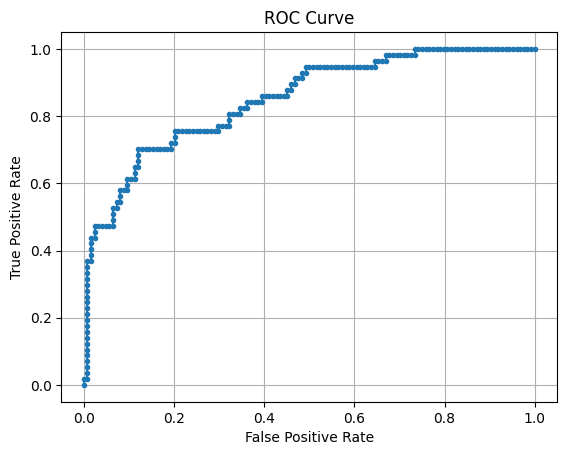

AUC: 0.8503112620260332


In [7]:
import matplotlib.pyplot as plt
def ROC_AUC(actual, predicted_probabilities):
    """
    Plot ROC curve and calculate AUC.

    Args:
    actual (list): List of actual labels.
    predicted_probabilities (list): List of predicted probabilities for the positive class.

    Returns:
    float: AUC value.
    """
    # Sort the predicted probabilities and corresponding actual labels
    sorted_indices = sorted(range(len(predicted_probabilities)), key=lambda i: predicted_probabilities[i], reverse=True)
    actual_sorted = [actual[i] for i in sorted_indices]
    predicted_probabilities_sorted = [predicted_probabilities[i] for i in sorted_indices]

    # Initialize variables
    tpr_list, fpr_list = [0],[0]
    auc=0
    tp = fp = 0
    total_positive = sum(actual)
    total_negative = len(actual) - sum(actual)

    # Calculate TPR and FPR
    for i in range(len(actual)):
        if actual_sorted[i] == 1:
            tp += 1
        else:
            fp += 1

        tpr = tp / total_positive
        fpr = fp / total_negative
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # Calculate area under the curve which is the final AUC value
    for i in range(len(fpr_list) - 1):
        auc += (fpr_list[i + 1] - fpr_list[i]) * (tpr_list[i + 1] + tpr_list[i]) / 2

    # Plot ROC curve
    plt.plot(fpr_list, tpr_list, marker='.', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)
    plt.show()

    return auc
auc = ROC_AUC(df['class'], df['scored.probability'])
print("AUC:", auc)

From the ROC Curve results, we can infer that the relationship between sensitivity and specificity is performing well. The AUC calculation shows a approximate 0.85. A higher AUC value indicates a better performance of the model at distinguishing the positive and negative classes, thus the model performs well.

### Task 11
Apply the Python functions we’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.

In [8]:
accuracy, precision, sensitivity, specificity, f1_score = task5_9(df['class'], df['scored.class'])
print("Accuracy:    ", accuracy)
print("Precision:   ", precision)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("F1 Score:    ", f1_score)

Accuracy:     0.8066298342541437
Precision:    0.84375
Sensitivity:  0.47368421052631576
Specificity:  0.9596774193548387
F1 Score:     0.6067415730337079


### Task 12
Now compare the output of our functions against the output of the pre-built functions available within the scikit-learn library. Specifically, apply the confusion_matrix(), accuracy_score(), precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. Discuss how
well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.

__Result Analysis:__
Comparing the output of our functions against the output of the pre-built functions. We can see that the result are all the same. So, after getting to understand the meaning of the function to model performance, we can directly use the pre-build function to evalute the model. But the pre-build function can't calculate the specificity. We need to use confusion_matrix to create a function if necessary.
|    | Pre-build  Function        | Created Function  | 
|-------------|---------------------|------------|
| Accuracy  |  0.8066298342541437                  | 0.8066298342541437  | 
| Precision| 0.84375                  | 0.84375| 
| F1 Score| 0.6067415730337079                   |  0.6067415730337079   | 
| Recall| 0.47368421052631576                 | 0.47368421052631576   | 
| Specificity| /                   |  0.9596774193548387  | 

In [9]:
# Load packages
from sklearn.metrics import confusion_matrix
con_matrix = pd.DataFrame(confusion_matrix(df['class'], df['scored.class']),columns = ['Predict 0', 'Predict 1'],
    index = ['True 0', 'True 1'])
con_matrix

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("Accuracy:  ",accuracy_score(df['class'],df['scored.class']))
print("Precision:  ",precision_score(df['class'],df['scored.class']))
print("Recall:   ",recall_score(df['class'],df['scored.class']))
print("F1 Score:  ",f1_score(df['class'],df['scored.class']))
print("-------------------------------------------------------")
print(classification_report(df['class'],df['scored.class']))

Accuracy:   0.8066298342541437
Precision:   0.84375
Recall:    0.47368421052631576
F1 Score:   0.6067415730337079
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



### Task 13
Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?

__Result Analisis:__ The result of the prebuild function for ROC is same with the created one and it can provide more information.  The result of AUC is similar. The difference is very small and can be ignored. So, we can directly use prebuild function in the future analysis.

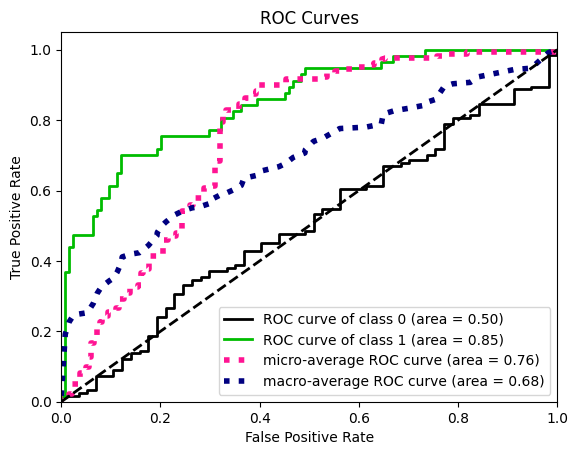

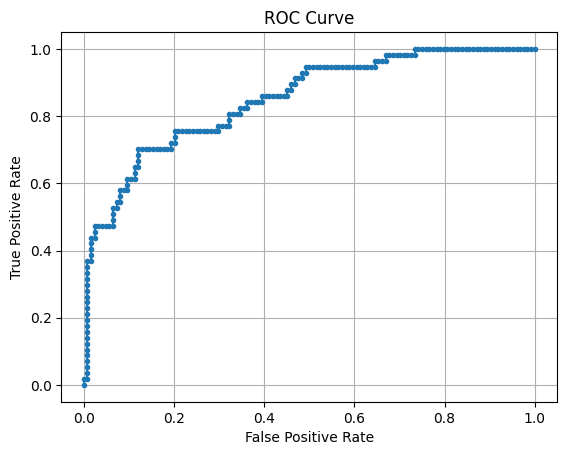

AUC by Pre-build function is : 0.8503112620260327
AUC by created function is : 0.8503112620260332


In [11]:
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y=df['class']
y_prob=df['scored.probability'].reset_index().values

#Use the metrics.plot_roc function to get the ROC
skplt.metrics.plot_roc(y, y_prob, cmap='nipy_spectral')
plt.show()

# Use the roc_auc_score function to get the AUC and compare with the created function
AUC = roc_auc_score(df['class'], df['scored.probability'])
auc = ROC_AUC(df['class'], df['scored.probability'])

print("AUC by Pre-build function is :" ,AUC)
print("AUC by created function is :", auc)

## Conclusion
Through tasks 1 to 11, we have mastered crosstab(), value_counts(), and gained a deeper understanding of model evaluation metrics, becoming more proficient with the logic behind calculating accuracy, precision, recall, specificity, and F1 Score. Through tasks 12 and 13, we have become skilled at using pre-built functions and comparing the results with our own custom functions, finding them to be completely consistent. Through these tasks, we have not only become better at using prebuilt functionalities but also have gained a deeper understanding of the underlying logic and thought processes.

## References
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand